<a href="https://colab.research.google.com/github/TolqinOrziyev/Aviacompany/blob/main/Aviakompaniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score, confusion_matrix, classification_report, accuracy_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [4]:
df_train=pd.read_csv('/content/train_dataset.csv', index_col=0)
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [6]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
for column in df_train.columns[:]:
    print(f"{df_train[column].name}:{df_train[column].unique()}")

Gender:['Male' 'Female']
Customer Type:['disloyal Customer' 'Loyal Customer']
Age:[33 49 43 27 11 30 38 39 24 62 42 59 19 56 46 47 31 36 29 52 34 44 45 58
 41 69 67 68 25 54 40 55 60 26 15 61 20 64 57 53 13 50 48 51 17 23 72 80
 28  8 37  9 21 32 65 12 22 35 18 10 16 63  7 70 66 77 79 73 14 71 76 74
 75 78]
Type of Travel:['Business travel' 'Personal Travel']
Class:['Eco' 'Business' 'Eco Plus']
Flight Distance:[ 571 1431  867 ... 2653 1223 1631]
Inflight wifi service:[2 4 1 3 5 0]
Departure/Arrival time convenient:[3 1 4 2 5 0]
Ease of Online booking:[2 4 3 1 5 0]
Gate location:[4 3 2 1 5]
Food and drink:[4 3 2 5 1 0]
Online boarding:[2 5 4 3 0 1]
Seat comfort:[4 3 2 5 1 0]
Inflight entertainment:[4 5 1 2 3 0]
On-board service:[3 5 1 4 2]
Leg room service:[1 5 4 2 3 0]
Baggage handling:[3 5 1 4 2]
Checkin service:[4 3 1 5 2 0]
Inflight service:[3 5 1 4 2]
Cleanliness:[4 3 2 5 1 0]
Departure Delay in Minutes:[ 10   0   2  62   1  76  16  12  42  36   5  31   3   7  17 138  37   4
  15  

In [8]:
df_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

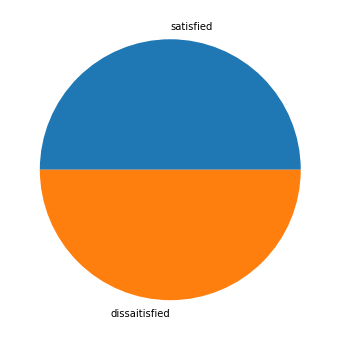

In [9]:
sat_rate=df_train['satisfaction'].value_counts()/len(df_train)*100
plt.figure(figsize=(6,6))
plt.pie(sat_rate, labels=['satisfied', 'dissaitisfied'])
plt.show()

In [10]:
df_train.corrwith(df_train.satisfaction).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [19]:
cols=['Customer Type', 'Type of Travel', 'Class', 'Gender']
df_train[cols]=df_train[cols].apply(LabelEncoder().fit_transform)

In [21]:
X=df_train.drop(['Departure/Arrival time convenient' ,'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Gate location', 'Gender'], axis=1).values
y=df_train.satisfaction

In [22]:
scaler=StandardScaler()

X=scaler.fit_transform(X)

**k-NN**

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=14)

knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:

y_predict=knn_model.predict(X_test)

In [25]:
JI=jaccard_score(y_predict, y_test)
JI

0.9847266881028939

In [26]:
print(f"Classification Report: \n{classification_report(y_test, y_predict)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       1.00      0.99      0.99      1243

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



Confusion matrix: 
[[1256    1]
 [  18 1225]]


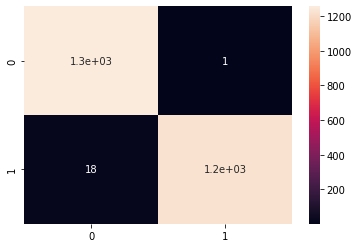

In [27]:
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_predict)}")
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

***The best result of n***

In [28]:
param_grid={'n_neighbors': np.arange(1,10)}
knn_gscv=GridSearchCV(knn_model, param_grid, cv=5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [29]:
knn_gscv.cv_results_['rank_test_score']

array([1, 7, 2, 8, 3, 6, 4, 8, 5], dtype=int32)

In [30]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [31]:
knn_gscv.best_score_

0.9942

**Cross Validation**

In [32]:
predict=cross_val_predict(estimator=knn_model, X=X, y=y, cv=5)

In [33]:
print(f"Classification Report: \n{classification_report(y, predict)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5000
           1       1.00      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion matrix: 
[[4991    9]
 [  49 4951]]


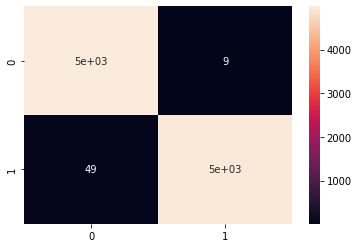

In [34]:
print(f"Confusion matrix: \n{confusion_matrix(y, predict)}")
sns.heatmap(confusion_matrix(y, predict), annot=True)
plt.show()

**Decision Tree**

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred=tree_model.predict(X_test)

In [38]:
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1241
           1       1.00      1.00      1.00      1259

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


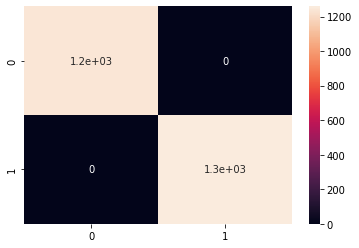

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

**Tree**

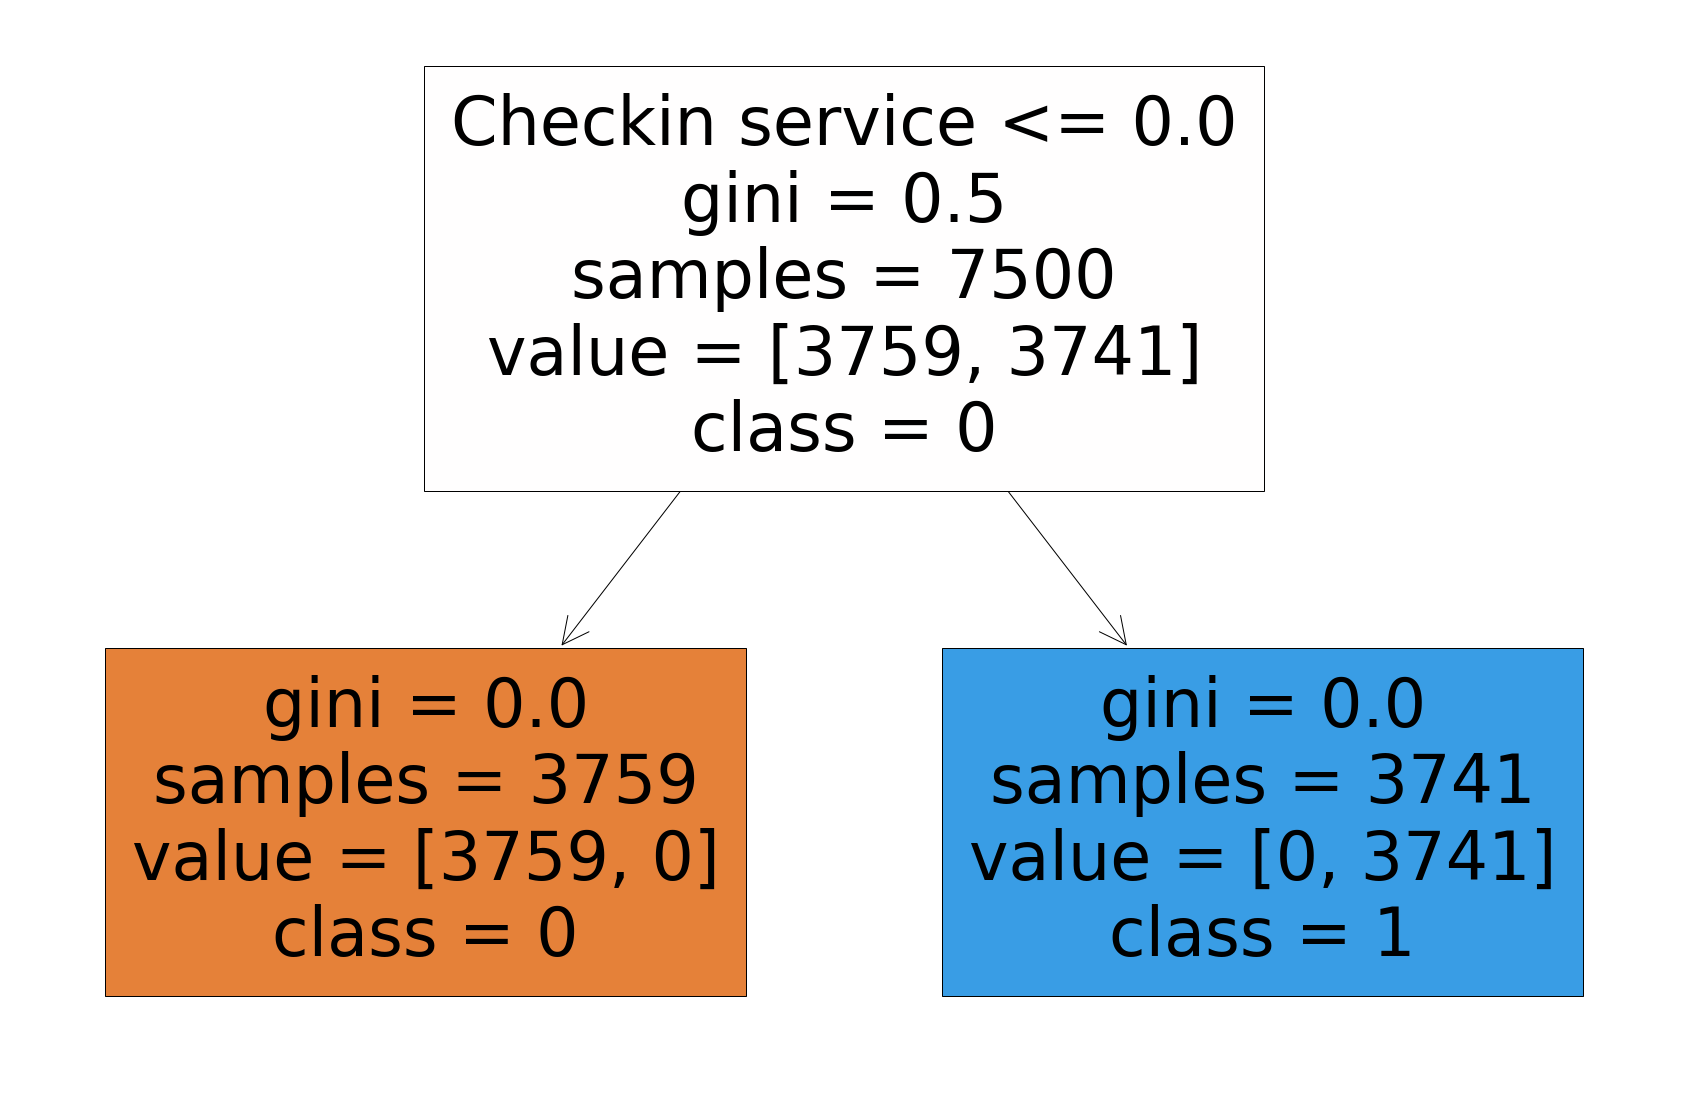

In [41]:
cols=df_train.drop('satisfaction', axis=1).columns
classes=['0', '1']

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()